In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

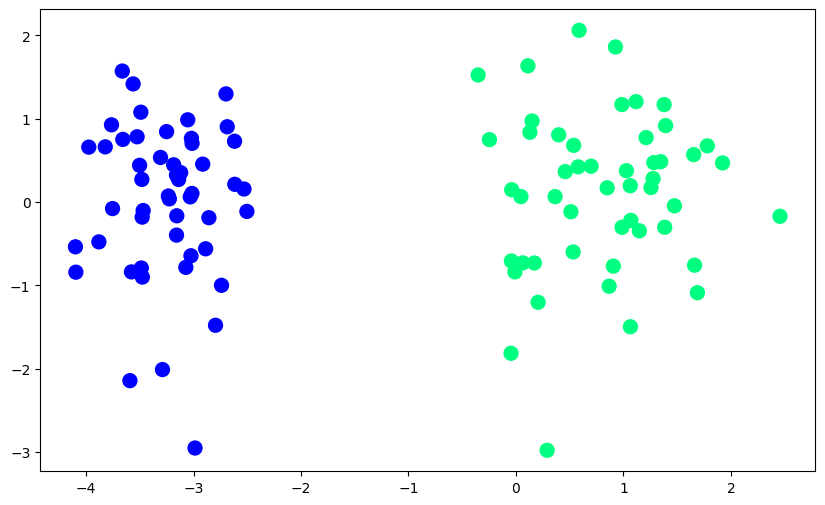

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver="lbfgs")  
lor.fit(X, y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

In [9]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [10]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [33]:
print(lor.coef_)
print(lor.intercept_)

[[6.16133467 0.42668242]]
[7.89840729]


In [34]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [35]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [61]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(10000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [62]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [63]:
coef_,intercept_ = gd(X,y)

In [64]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [65]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

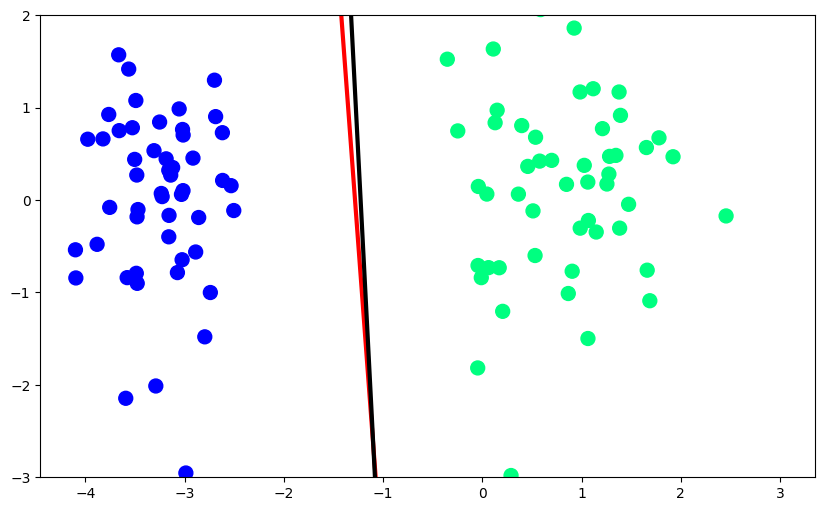

In [66]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)